# NOTICE:
### 3d XYZ in \<label\>.txt are in rect camera coord.
### 2d box xy are in image2 coord
### Points in \<lidar\>.bin are in Velodyne coord.
***
# Coordinate Transformation:
    y_image2 = P^2_rect * x_rect
    y_image2 = P^2_rect * R0_rect * Tr_velo_to_cam * x_velo
    x_ref = Tr_velo_to_cam * x_velo
    x_rect = R0_rect * x_ref

    P^2_rect = [f^2_u,  0,      c^2_u,  -f^2_u b^2_x;
                0,      f^2_v,  c^2_v,  -f^2_v b^2_y;
                0,      0,      1,      0]
                = K * [1|t]
***
# Coordinate Visualization:
    image2 coord:
        ----> x-axis (u)
    |
    |
    v y-axis (v)

    Velodyne coordinate system:
    front x, left y, up z

    #     7 -------- 4
    #    /|  (z)    /|
    #   6 ---|---- 5 .
    #   | |  |     | |
    #   . 3 -|------ 0
    #   |/   .- - -|/ - - -> (y)
    #   2 --/------- 1
    #      /
    #     /
    #   (x)

    rect/ref camera coord:
    right x, down y, front z

    #     7 -------- 4
    #    /|         /|
    #   6 -------- 5 .
    #   | |        | |
    #   . 3 -------- 0
    #   |/   .- - -|/ - - -> (x)
    #   2 ---|----- 1
    #        |
    #        | (y)

    Ref (KITTI paper): http://www.cvlibs.net/publications/Geiger2013IJRR.pdf

***

In [1]:
from Kitti import *
from utils import *
import copy

In [2]:
index = 0
base_path = r'./Kitti'
kitti = Kitti_Dataset(base_path)
# rgb image
img = kitti.get_rgb(index)
img_3d = copy.deepcopy(img)
# label
labels = kitti.get_label(index)
# calibration information
calib = kitti.get_calib(index)
# point clouds
point_clouds = kitti.get_pcs(index)

In [3]:
print(calib)

 P0: 
[[707.05   0.   604.08   0.  ]
 [  0.   707.05 180.51   0.  ]
 [  0.     0.     1.     0.  ]]
P1: 
[[ 707.05    0.    604.08 -379.78]
 [   0.    707.05  180.51    0.  ]
 [   0.      0.      1.      0.  ]]
P2: 
[[707.05   0.   604.08  45.76]
 [  0.   707.05 180.51  -0.35]
 [  0.     0.     1.     0.  ]]
P3: 
[[ 707.05    0.    604.08 -334.11]
 [   0.    707.05  180.51    2.33]
 [   0.      0.      1.      0.  ]]
Tr_velo_to_cam: 
[[ 0.01 -1.   -0.   -0.02]
 [-0.    0.   -1.   -0.06]
 [ 1.    0.01 -0.   -0.33]]
Tr_cam_to_velo: 
[[ 0.01 -0.    1.    0.33]
 [-1.    0.    0.01 -0.02]
 [-0.   -1.   -0.   -0.06]]
Tr_imu_to_velo: 
[[ 1.    0.   -0.   -0.81]
 [-0.    1.   -0.01  0.32]
 [ 0.    0.01  1.   -0.8 ]]


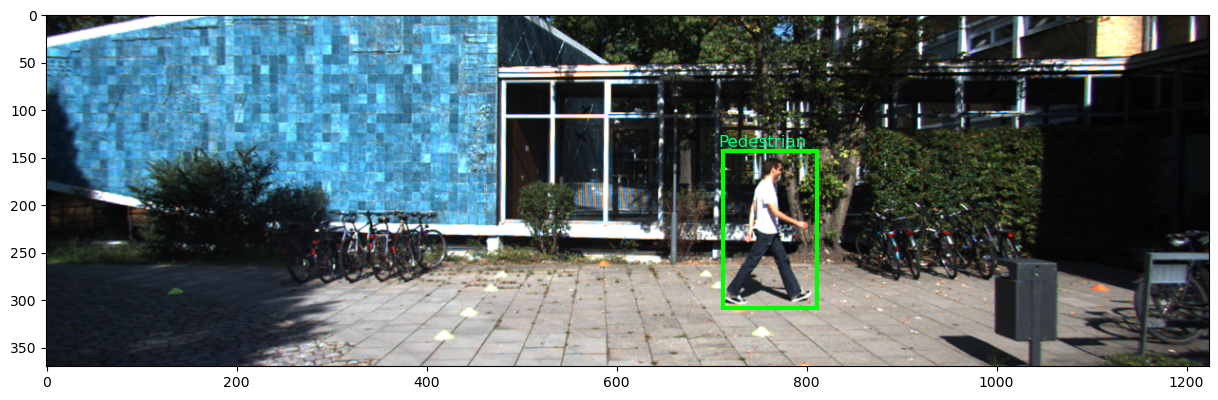

In [7]:
ax = draw_2DBBox_in_rgb(img, labels, figsize=(15, 8))

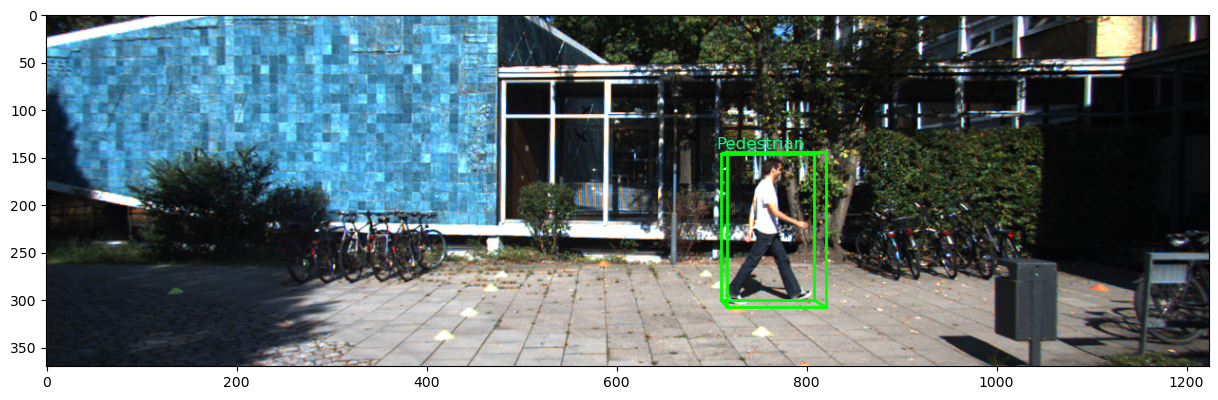

In [8]:
ax = draw_3DBBox_in_rgb(img_3d, labels, calib, figsize=(15, 8))

point_size: 0.05  point_step: 5  total_point_num: 23077


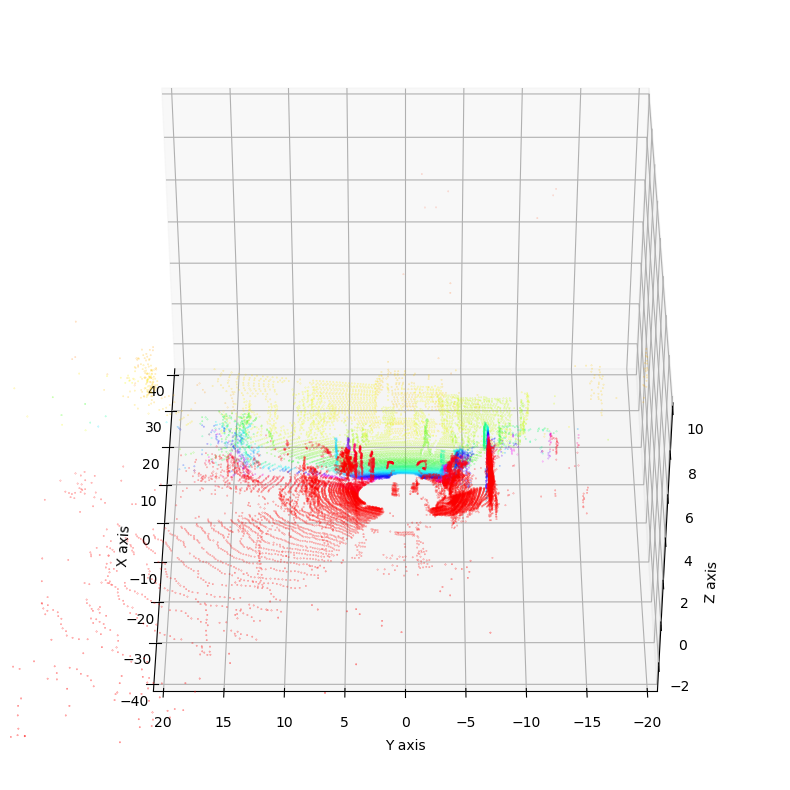

In [6]:
ax = draw_pointclouds_in_velo(point_clouds, xlim3d=[-40, 40])

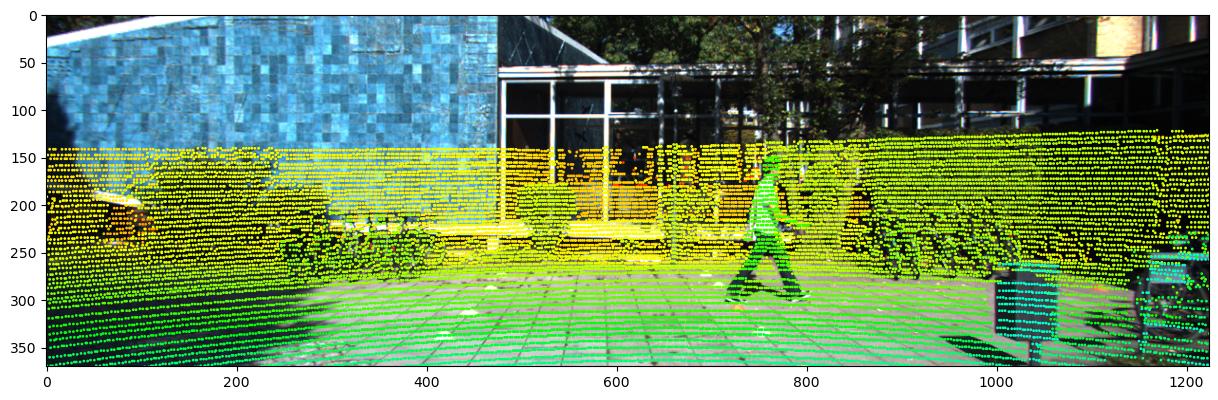

In [11]:
ax = draw_pointclouds_in_rgb(point_clouds, img, calib, figsize=(15, 8))

point_size: 0.05  point_step: 5  total_point_num: 23077


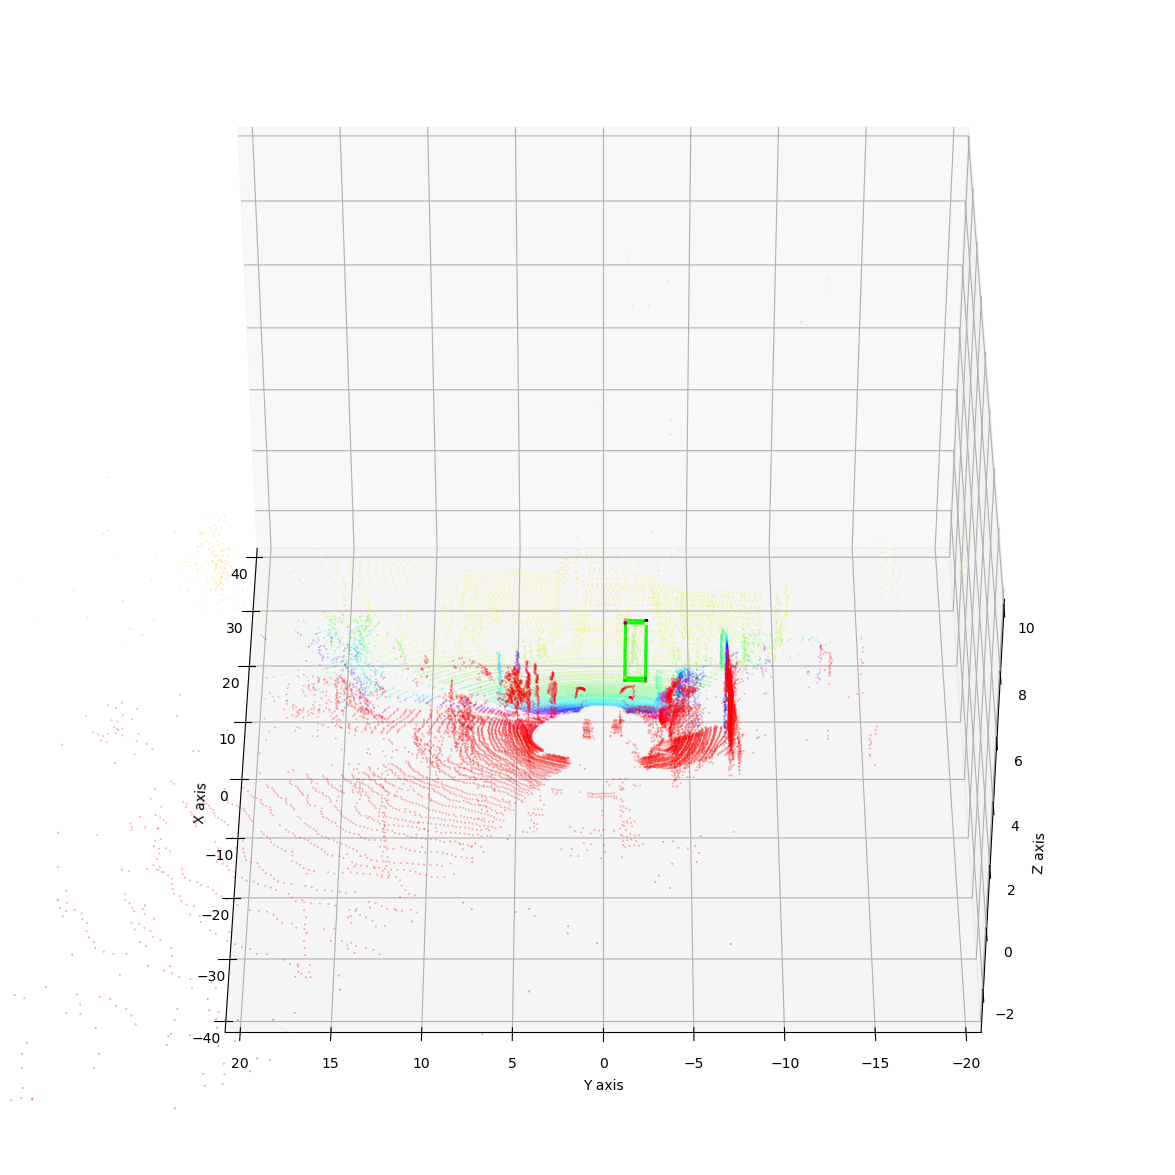

In [13]:
ax = draw_3DBBox_in_velo(point_clouds, labels, calib, xlim3d=[-40, 40], figsize=(15, 15))